# <center> **Итоговый проект. Анализ резюме из HeadHunter**

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

## <center> **`1.` Постановка задачи**

**Проблематика:** часть соискателей не указывает желаемую заработную плату, когда составляет своё резюме.

**Чем это плохо?** Это является помехой для рекомендательной системы *HeadHunter*, которая подбирает соискателям список наиболее подходящих вакансий, а работодателям — список наиболее подходящих специалистов.

**Бизнес-задача:** ⭐ Компания *HeadHunter* хочет построить модель, которая бы автоматически определяла примерный уровень заработной платы, подходящей пользователю, исходя из информации, которую он указал о себе.

### <center> **Организационная информация**

Наш проект будет состоять из четырёх частей:

`1.` *Постановка задачи*;

`2.` *Базовый анализ структуры данных*;

`3.` *Преобразование данных*;

`4.` *Разведывательный анализ*;

`5.` *Очистка данных*.

## <center> **`2.` Исследование структуры данных**

Импортируем модули, которые понадобятся нам для решения задачи:

In [1]:
# Для работы с датафреймом
import pandas as pd
import numpy as np

# Для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Прочитаем файл с исходными данными:

In [2]:
# Читаем основной файл-csv
headhunter_data = pd.read_csv('Прочие файлы/dst-3.0_16_1_hh_database.csv', sep=';')

# Создаём копию основного файла
headhunter_df = headhunter_data.copy() 

Выведем размерность таблицы

In [8]:
headhunter_df.shape

(44744, 12)

Выведем несколько первых строк

In [ ]:
# Выведем первые пять строк
headhunter_df.head()

Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [ ]:
headhunter_df.info()

Выведем основную информацию о числе непустых значений в столбцах и их типах.

In [ ]:
headhunter_df.isnull().sum()

В данных присутствуют пропуски в следующих столбцах: 

* `Опыт работы` (168 пропусков);
* `Последнее/нынешнее место работы` (1 пропуск); 
* `Последняя/нынешняя должность` (2 пропуска).

Выведем основную статистическую информацию о столбцах.

In [ ]:
headhunter_df.describe()

Выведем количество уникальных значений содержится в столбце «Опыт работы»:

In [ ]:
headhunter_df['Опыт работы'].nunique()

Выведем самую распространённую должность:

In [ ]:
headhunter_df['Ищет работу на должность:'].value_counts()

## <center> **`3.` Преобразование данных**

#### $3.1$

С помощью функции-преобразования создаём новый признак `Образование`, который будет иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

In [22]:
# Создаём функцию get_education_level()
def get_education_level(education):
    
    # Создаём список с указанием уровня образования.
    education_list = ['высшее', 'специальное']
    
    # С помощью метода split() разбиваем строку по прабелам, и полученный список заносим в переменную string_list.
    string_list = education.split(' ')
    
    # Выделяем уровень образования
    education_type = string_list[0]
    
    if string_list[1] in education_list: # если второе слово 'высшее' или 'специальное'
        education_type += ' ' + string_list[1] # добавляем данное слово к словосочетанию уровня образования
        
    return education_type



# Создаём признак 'Образование'
headhunter_df['Образование'] = headhunter_df['Образование и ВУЗ'].apply(get_education_level)

In [23]:
# Выводим количество соискателей в зависимости от уровня образования
headhunter_df.Образование.value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

#### $3.2$

Из признака `Пол, возраст` создадим два новых: `Пол` и `Возраст`.

* Признак пола будет иметь два уникальных строковых значения: **М** — мужчина, **Ж** — женщина.

* Признак возраста должен быть представлен целыми числами.

In [24]:
# Выделяем признак 'Пол'
def get_gender(gender):
    
    # С помощью метода split() разбиваем строку по прабелам,
    # и полученный список заносим в переменную string_list
    string_list = gender.split(' ')
    
    if string_list[0] == 'Мужчина':  # если первое слово списка - 'Мужчина':
        return 'М'                   # выводим 'М'
    
    else:                            # в противном случае
        return 'Ж'                   # выводим 'Ж'
    



# Выделяем признак 'Возраст'
def get_age(age):
    
    # С помощью метода split() разбиваем строку по прабелам,
    # и полученный список заносим в переменную string_list
    string_list = age.split(' ')
    
    # Создаём список для чисел
    int_list = []
    
    # Создаём цикл по элементам списка
    for value in string_list:
        
        try:
            int_value = int(value)
            int_list.append(int_value)
            
        except ValueError:
            continue
        
    age = int_list[0]
    
    # Выводим значение
    return age



# Создаём признаки 'Пол' и 'Возраст' из признака 'Пол, возраст'
headhunter_df['Пол'] = headhunter_df['Пол, возраст'].apply(get_gender)
headhunter_df['Возраст'] = headhunter_df['Пол, возраст'].apply(get_age)

In [25]:
# Выведем долю мужских и женских резюме в данных
share_resumes = (headhunter_df.Пол.value_counts(normalize = True)) * 100
print('Доля мужских и женских резюме в данных: \n{}'.format(round(share_resumes, 2)), '\n')


# Выведем долю значение среднего возраста соискателей
mean_age = headhunter_df.Возраст.mean()
print('Средний возраст соискателей: {} года.'.format(round(mean_age, 1)))

Доля мужских и женских резюме в данных: 
М    80.93
Ж    19.07
Name: Пол, dtype: float64 

Средний возраст соискателей: 32.2 года.


#### $3.3$

Преобразуем признак `Опыт работы`. Из столбца выделим общий опыт работы соискателя в месяцах, новый признак назовём «`Опыт работы (месяц)`».

In [26]:
# Переводим рабочий стаж в месяцы.
def get_experience(arg):
    
    # В случае если попадаем на пропущенное значение,
    # Выводим None
    if arg is np.nan:
        return None
    
    # Создаём список склонений слова месяц
    month_words = ['месяц', 'месяцев', 'месяца']
    
    # Создаём список склонений слова год
    year_words = ['год', 'года', 'лет']
    
    # Разделяем строку по пробелам
    arg_split = arg.split(' ')[:7]
    
    # Количество лет
    number_years = 0
    
    # Количество месяцев
    number_months = 0
    
    # Общее количество месяцев
    total_number_months = 0
    
    # Создаём цикл по индексам и значениям
    for index, values in enumerate(arg_split):
        
        if values in month_words:
            number_months = int(arg_split[index - 1])
        
        if values in year_words:
            number_years = int(arg_split[index - 1])
            
        total_number_months = int((number_years)*12 + number_months)
        
    
    return total_number_months



# Создаём признак 'Опыт работы (месяц)'
headhunter_df['Опыт работы (месяц)'] = headhunter_df['Опыт работы'].apply(get_experience)

In [27]:
# Выведем медианный опыт работы
print('Медианный опыт работы: {} месяцев.'.format(int(headhunter_df['Опыт работы (месяц)'].median(axis = 0))))

Медианный опыт работы: 100 месяцев.


#### $3.4$

Из признака «`Город, переезд, командировки`» создадим триновых признака: «`Город`», «`Готовность к переезду`», «`Готовность к командировкам`».

In [28]:
# Выделяем признак «Город». Данный признак будет содержать только четыре категории: «Москва», «Санкт-Петербург» и «город-миллионник». 
# Остальные обозначим как «другие».
def get_city(arg):
    
    # Создаём список городов «Москва» и «Санкт-Петербург»
    main_cities = ['Москва', 'Санкт-Петербург']
    
    # Создаём список городов «миллионников»
    millionaire_cities = [
        'Новосибирск', 
        'Екатеринбург', 
        'Нижний Новгород', 
        'Казань', 
        'Челябинск', 
        'Омск', 
        'Самара', 
        'Ростов-на-Дону', 
        'Уфа', 
        'Красноярск', 
        'Пермь', 
        'Воронеж', 
        'Волгоград'
    ]
    
    # Разделяем строку по пробелам
    string_list = arg.split(' ')
    
    # Выделяем первый элемент списка, который обозначает название города
    city = string_list[0]
    
    
    # Создаём значения признака «Город»
    if city in main_cities:
        return city
    
    elif city in millionaire_cities:
        return 'Город-миллионник'
    
    else:
        return 'Другие'
    
    
    
# Выделяем признак 'Готовность к переезду'
def get_move(arg):
    
    # Если соискатель не готов к переезду, будем возвращать False,
    # В противном случае - True
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    
    elif 'хочу' in arg:
        return True
    
    else:
        return True
    
    

# Выделяем признак 'Готовность к командировкам'
def get_business_trip(arg):
    
    # Если соискатель не готов к командировкам, будем возвращать False,
    # В противном случае - True
    if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
        return False
    
    else:
        return True
    
    

# Применяем функцию get_city (Город) к признаку 'Город, переезд, командировки'
headhunter_df['Город'] = headhunter_df['Город, переезд, командировки'].apply(get_city)

# Применяем функцию get_move (Готовность к переезду) к признаку 'Город, переезд, командировки'
headhunter_df['Готовность к переезду'] = headhunter_df['Город, переезд, командировки'].apply(get_move)

# Применяем функцию get_business_trip (Готовность к командировкам) к признаку 'Город, переезд, командировки'
headhunter_df['Готовность к командировкам'] = headhunter_df['Город, переезд, командировки'].apply(get_business_trip)

In [29]:
# Выведем долю соискателей, проживающих в Санкт-Петербурге
applicants_from_SPB = headhunter_df[headhunter_df.Город == 'Санкт-Петербург'].shape[0]  # количество соискателей
SPB_percent = round((applicants_from_SPB / headhunter_df.shape[0]) * 100)               # процент соискателей
print(f'Доля соискателей, проживающих в Санкт-Петербурге: {SPB_percent}%')


# Выведем долю соискателей, проживающих в Москве
applicants_from_Moscow = headhunter_df[headhunter_df.Город == 'Москва'].shape[0]        # количество соискателей
Moscow_percent = round((applicants_from_Moscow / headhunter_df.shape[0]) * 100)         # процент соискателей
print(f'Доля соискателей, проживающих в Москве: {Moscow_percent}%')


# Выведем долю соискателей, готовых и к переезду, и к командировкам
ready_to_move_and_BusinessTrip = headhunter_df[(headhunter_df['Готовность к переезду'] == True) & (headhunter_df['Готовность к командировкам'] == True)].shape[0]  # количество соискателей
ready_to_move_and_BusinessTrip_percent = round((ready_to_move_and_BusinessTrip / headhunter_df.shape[0]) * 100)                                                    # процент соискателей
print(f'Доля соискателей, готовых и к переезду, и к командировкам: {ready_to_move_and_BusinessTrip_percent}%')

Доля соискателей, проживающих в Санкт-Петербурге: 11%
Доля соискателей, проживающих в Москве: 37%
Доля соискателей, готовых и к переезду, и к командировкам: 32%


#### $3.5$

Преобразуем признаки «`Занятость`» и «`График`». Cоздадим признаки-«мигалки» для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится *True*, иначе — *False*.

In [30]:
# Создаём списки графиков работы
employments_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
charts_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']


# Создаём цикл по спискам графиков работы
for employment, chart in zip(employments_list, charts_list):
    
    # Из признака «Занятость» создаём новые признаки
    headhunter_df[employment] = headhunter_df['Занятость'].apply(lambda x: employment in x)
    
    # Из признака «График» создаём новые признаки
    headhunter_df[chart] = headhunter_df['График'].apply(lambda x: chart in x)

In [31]:
# Выведем количество соискателей на позиции 'проектная работа' или 'волонтёрство'
project_work = headhunter_df['проектная работа'] == True
volunteering_work = headhunter_df['волонтерство'] == True
print(f"Количество соискателей на позиции 'проектная работа' или 'волонтёрство': {headhunter_df[project_work & volunteering_work].shape[0]} человек.")


# Выведем количество соискателей на позиции 'вахтовый метод' или 'гибкий график'
shift_method = headhunter_df['вахтовый метод'] == True
flexible_schedule = headhunter_df['гибкий график'] == True
print(f"Количество соискателей на позиции 'вахтовый метод' или 'гибкий график': {headhunter_df[shift_method & flexible_schedule].shape[0]} человек.")

Количество соискателей на позиции 'проектная работа' или 'волонтёрство': 436 человек.
Количество соискателей на позиции 'вахтовый метод' или 'гибкий график': 2311 человек.


#### $3.6$

Преобразуем признак «`ЗП`». Приведём значения данного признака к единой валюте (в данном случае к рублю). 

Для этого к основному датасету добавим ещё один *DataFrame*, в котором собраны курсы валют.

In [32]:
# Создаём новый DataFrame из файла ExchangeRates.csv а также его копию
rates_data = pd.read_csv('Прочие файлы/ExchangeRates.csv', sep=',')
rates_df = rates_data.copy()


# Удаляем ненужные столбцы из таблицы "rates_df"
rates_df = rates_df.drop(['per', 'time', 'vol'], axis = 1)


# Переводим признак 'Обновление резюме' в формат datetime и выделяем дату
headhunter_df['Обновление резюме'] = pd.to_datetime(headhunter_df['Обновление резюме']).dt.date

# Обновлённый признак 'Обновление резюме' переводим в формат datetime
headhunter_df['Обновление резюме'] = pd.to_datetime(headhunter_df['Обновление резюме'])

# Переводим признак 'date' в формат datetime
rates_df['date'] = pd.to_datetime(rates_df['date'])



# Разделяем признак 'ЗП' на 2 других признака: 'Сумма ЗП' и 'Курс'
# Выделяем сумму ЗП в отдельный столбец
def get_salary(arg):
    
    # Разделим строку по пробелам
    salary_list = arg.split(' ')
    
    # Удаляем слово 'руб'
    salary_list.remove(salary_list[1])

    new_arg = ''.join(salary_list)
    
    return new_arg


# Создаём признак 'Сумма ЗП'
headhunter_df['Сумма ЗП'] = headhunter_df['ЗП'].apply(get_salary)



# Выделяем наименование валюты и переводим его в стандарт ISO
def get_currency(arg):
    
    # Разделим строку по пробелам
    salary_list = arg.split(' ')
    
    # Удаляем размер ЗП
    salary_list.remove(salary_list[0])
    
    # Берём значение курса
    currency = salary_list[0]
    
    # Переводим наименование валюты в стандарт ISO
    if currency == 'руб.':
        currency = 'RUB'
        
    if currency == 'грн':
        currency = 'UAH'
        
    if currency == 'белруб':
        currency = 'BYN'
        
    if currency == 'сум':
        currency = 'UZS'
    
    # Удаляем имеющиеся значения в списке    
    salary_list.remove(salary_list[0])
    
    # Добавляем обновлённые значения
    salary_list.append(currency)
    
    new_arg = ''.join(salary_list)
    
    return new_arg



# Создаём признак 'Курс'
headhunter_df['Курс'] = headhunter_df['ЗП'].apply(get_currency)

# Заменяем значение бел.руб. в столбце 'Курс' на BYN
headhunter_df.loc[headhunter_df['Курс'] == 'бел.руб.', 'Курс'] = 'BYN'

# Заменяем значение грн. в столбце 'Курс' на UAH
headhunter_df.loc[headhunter_df['Курс'] == 'грн.', 'Курс'] = 'UAH'

# Удаляем признак 'ЗП'
headhunter_df = headhunter_df.drop('ЗП', axis = 1)



# Соединяем таблицы "headhunter_df" и "rates_df"
headhunter_df = headhunter_df.merge(
    rates_df,
    left_on = ['Курс', 'Обновление резюме'],
    right_on = ['currency', 'date'],
    how = 'left'
)



# Заполняем пропуски
headhunter_df['currency'] = headhunter_df['currency'].fillna('RUB')    # заполняем значения NaN в столбце 'currency' на RUB
headhunter_df['close'] = headhunter_df['close'].fillna(1)              # заполняем значения NaN в столбце 'close' на 1
headhunter_df['proportion'] = headhunter_df['proportion'].fillna(1)    # заполняем значения NaN в столбце 'proportion' на 1

# Переводим тип столбца "Сумма ЗП" из 'object' в 'int64'
headhunter_df['Сумма ЗП'] = pd.to_numeric(headhunter_df['Сумма ЗП']) 


# Умножаем сумму желаемой заработной платы на присоединённый курс валюты (close) и делим на пропорцию
headhunter_df['ЗП (руб)'] = (headhunter_df['Сумма ЗП'] * headhunter_df['close']) // headhunter_df['proportion']

In [33]:
# Выведем медианное значение желаемой ЗП
print(f"Медианное значение желаемой ЗП: {headhunter_df['ЗП (руб)'].median()} рублей.")

Медианное значение желаемой ЗП: 59018.5 рублей.


## <center> **`4.` Исследование зависимостей в данных**

#### $4.1$

Построим распределение признака «`Возраст`».

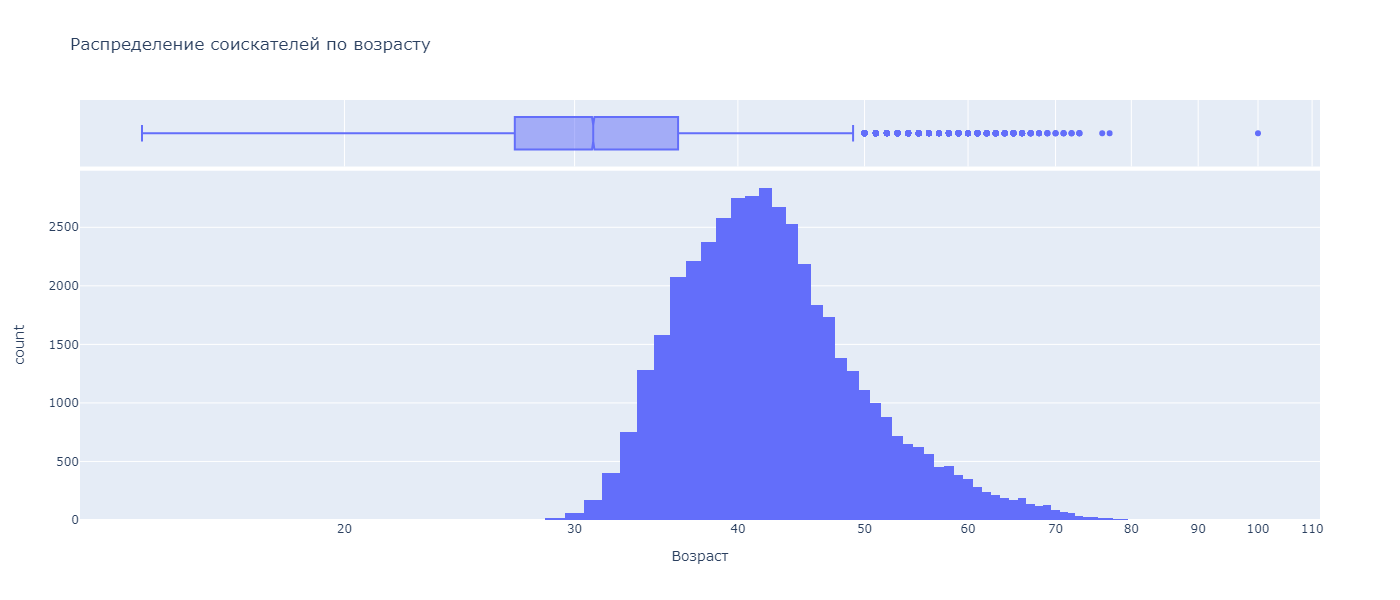

In [34]:
# Строим гистограмму
fig = px.histogram(
    data_frame = headhunter_df,                      # DataFrame
    x = 'Возраст',                                   # распределение по оси x
    marginal = 'box',                                # график предельного распределения
    log_x = True,                                    # логарифмирование по оси x              
    height = 600,                                    # высота
    width = 1400,                                    # ширина
    title = 'Распределение соискателей по возрасту'  # название графика
)

# Выводим график
fig.show('png')

**Вывод:** 

Общая гистограмма показывает, что средний возраст наибольшего количества соискателей составляет 30 лет, причём минимальный возраст соискателей составляет 17 лет, и далее с возрастом количество соискателей резко возрастает. Максимальный возраст находится в диапазоне от 65 до 77 лет. Так же из гистограммы можно заключить, что средний возраст большинства соискателей находится в интервале от 22 лет (1284 человека), до 38 лет (1110 человек). На данных графиках можно наблюдать одно аномальное значение: среди общего количества соискателей присутствует человек, возраст которого равняется 100 годам, в следствие чего в статистику его не квлючаем.

#### $4.2$

Построим распределение признака «`Опыт работы (месяц)`».

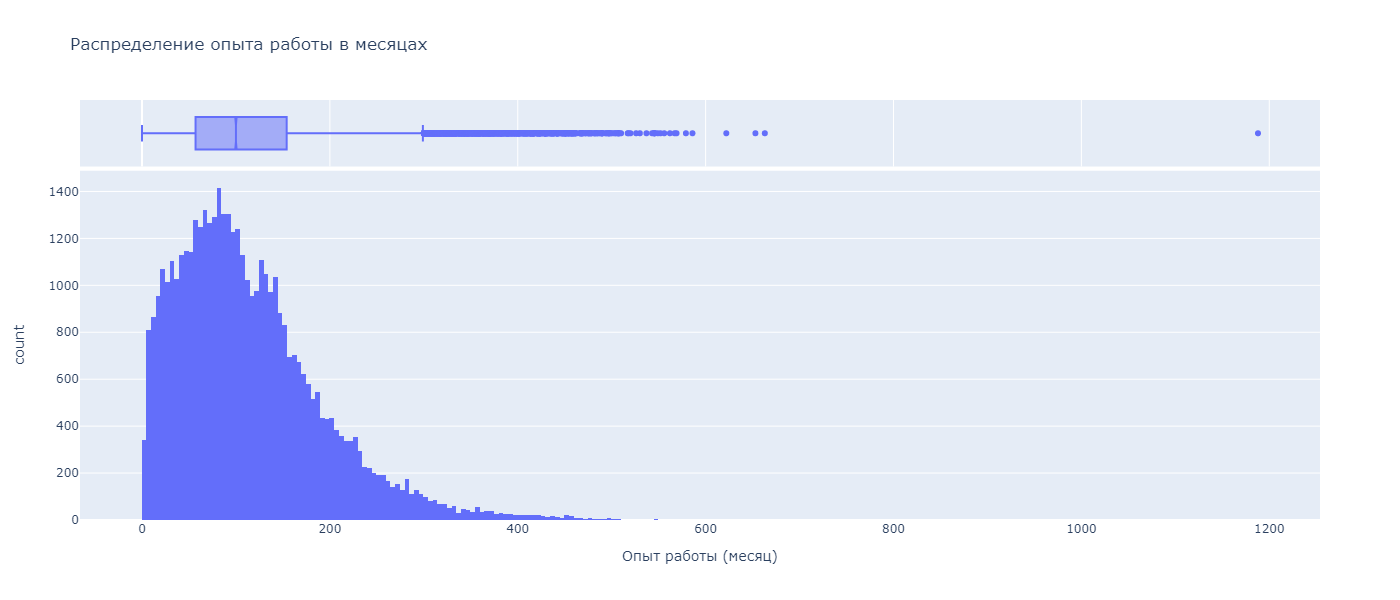

In [35]:
# Строим гистограмму
fig = px.histogram(
    data_frame = headhunter_df,                      # DataFrame
    x = 'Опыт работы (месяц)',                       # распределение по оси x
    marginal = 'box',                                # график предельного распределения
    height = 600,                                    # высота
    width = 1400,                                    # ширина
    title = 'Распределение опыта работы в месяцах'   # название графика
)

# Выводим график
fig.show('png')

**Вывод:** 

Общая гистограмма показывает, что у наибольшего количества соискателей (1414 человек) опыт работы находится в интервале от 80 до 84 месяцев. Причём количество соискателей с наименьшим опытом (от 0 до 4 месяцев), составляет 342 человека. Касаемо самых опытных соискателей (опыт работы от 565 до 569 месяцев), их количество составляет всего 2 человека. Такое маленькое количество среди самых опытных соискателей объясняется пожилым возрастом, а также слабым здоровьем граждан, входящих в данную возрастную категорию. Также в признаке присутствуют аномальные значения, для которых опыт работы находится в интервале от 600 месяцев и более. Данные значения не будут учитываться.

#### $4.3$

Построим распределение признака «`ЗП (руб)`».

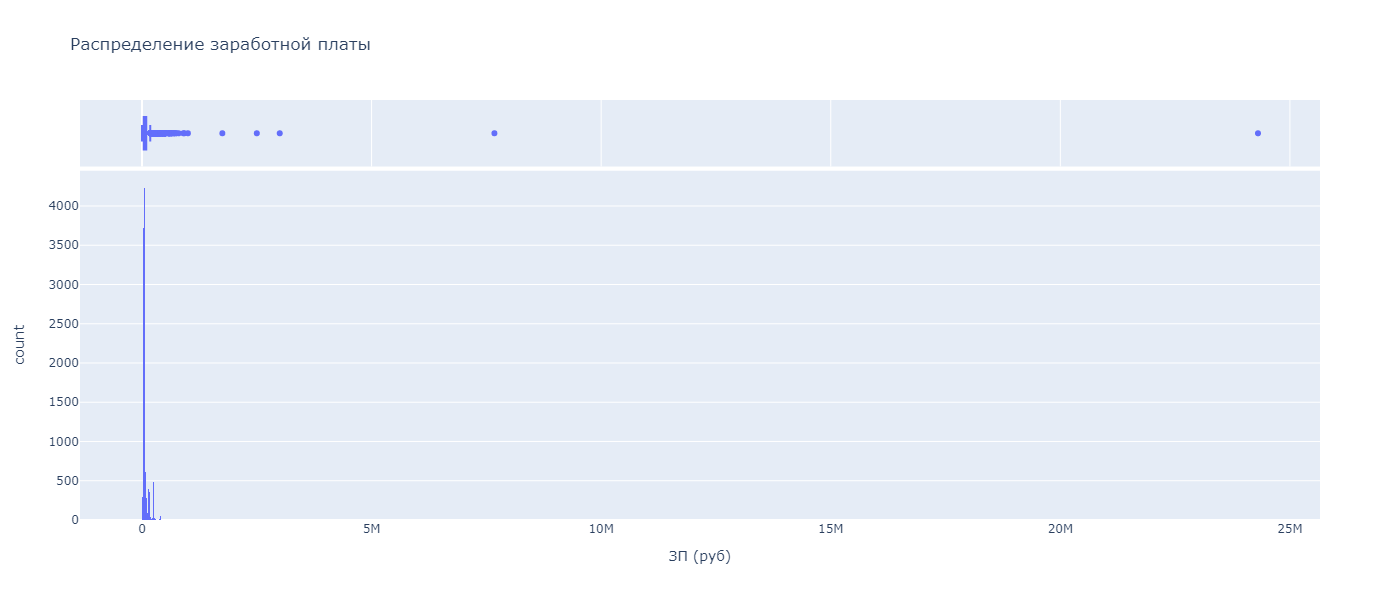

In [36]:
# Строим гистограмму
fig = px.histogram(
    data_frame = headhunter_df,                # DataFrame
    x = 'ЗП (руб)',                            # распределение по оси x
    marginal = 'box',                          # график предельного распределения
    height = 600,                              # высота
    width = 1400,                              # ширина
    title = 'Распределение заработной платы'   # название графика
)

# Выводим график
fig.show('png')

**Вывод:** 

Общая гистограмма показывает, что предельные значения признака заработной платы находятся в интервале от 5000 до 1М рублей, причём желаемая заработная плата большинства соискателей находится в интервале от 50000 до 55000 рублей. 

В данном признаке также наблюдаются 5 аномалий в виде уровня желаемой ЗП от 1.75М до 24М рублей, что не может соответствовать действительности. Данные показатели необходимо исключить из статистики.

#### $4.4$

Построим диаграмму, которая показывает зависимость медианной желаемой заработной платы («`ЗП (руб)`») от уровня образования («`Образование`»).

Для этого используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

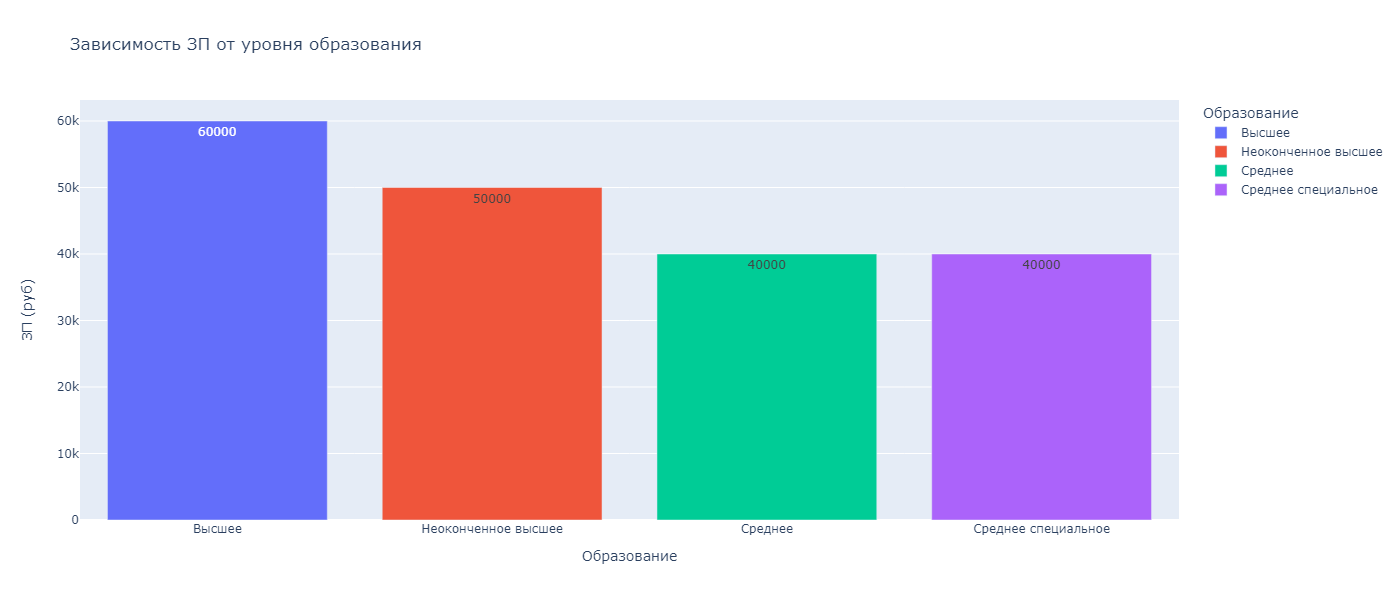

In [37]:
# Создаём DataFrame, в котором отразим зависимость медианной желаемой заработной платы от уровня образования
bar_data1 = headhunter_df.groupby(
    by = 'Образование',
    as_index = False
)[['ЗП (руб)']].median()


# Строим диаграмму
fig = px.bar(
    data_frame = bar_data1,                         # DataFrame
    x = 'Образование',                              # распределение по оси x
    y = 'ЗП (руб)',                                 # распределение по оси y
    color = 'Образование',                          # цвет столбцов
    text = 'ЗП (руб)',                              # текст на столбцах
    height = 600,                                   # высота
    width = 1400,                                   # ширина
    title = 'Зависимость ЗП от уровня образования'  # название графика
)

# Выводим график
fig.show('png')

**Вывод:** 

Из диаграммы можно сделать вывод, что наибольший уровень желаемой заработной платы наблюдается у соискателей, имеющих высшее образование. Желаемая заработная плата кандидатов данной категории составляет 60000 рублей. 

Наименьший уровень заработной платы наблюдается у кандидатов, имеющих среднее и среднее специальное образование. Желаемая заработная плата соискателей из данной категории составляет 40000 рублей.

Признак уровня образования играет существенную роль при прогнозировании заработной платы ввиду того, чем выше уровень образования представителей наибольшего числа профессий,тем выше его квалификация, а следовательно тем выше они ценятся на рынке труда и соответственно оплата их услуг должна быть больше.

#### $4.5$

Построим диаграмму, которая показывает распределение желаемой заработной платы («`ЗП (руб)`») в зависимости от города («`Город`»). 

Для этого используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

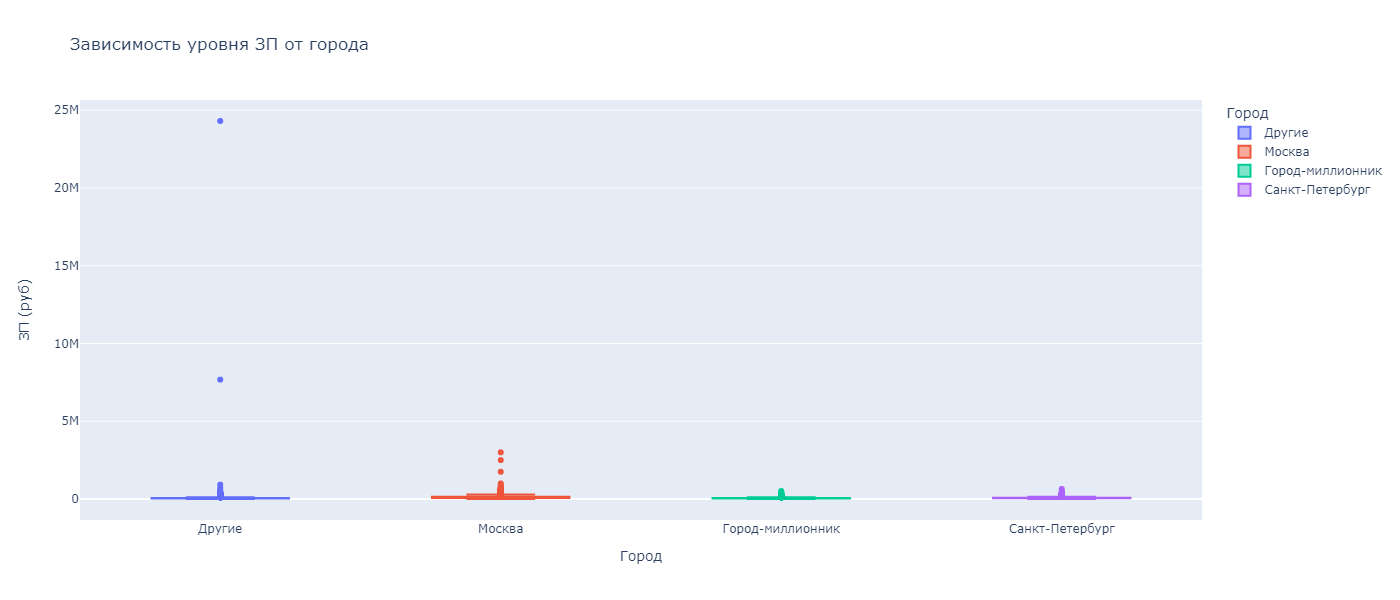

In [38]:
# Строим диаграмму
fig = px.box(
    data_frame = headhunter_df,                # DataFrame
    x = 'Город',                               # распределение по оси x
    y = 'ЗП (руб)',                            # распределение по оси y
    color = 'Город',                           # цвет графика
    height = 600,                              # высота
    width = 1400,                              # ширина
    orientation = 'v',                         # вертиуальная ориентация графика
    title = 'Зависимость уровня ЗП от города'  # название графика
)

# Выводим график
fig.show('png')

**Вывод:** 

Из данной диаграммы можно заключить, что размер города, а также количество жителей соотносятся прямопропорционально с уровнем желаемой заработной платы, т.е. чем больше город и его население, тем выше желаемая заработная плата. По примеру Москвы мы можем видеть, что здесь наблюдается самый высокий уровень желаемой ЗП, он равен 285к руб.. Это связано в первую очередь с тем, что Московская область является самым развитым, крупным и самым населённым регионом в стране. Также в Москве сосредоточено самое большое количество высших учебных заведений и самое большое количество рабочих мест. После Москвы самым развитым городом является Санкт-Петербург, здесь уровень желаемой заработной платы составляет 145к рублей.

При прогнозировании заработной платы признак города имеет очень важную роль, т.к. учитываются такие элементы, как уровень населения, развитие рассматриваемого региона, инфраструктура, и прочее. Совокупность всех этих факторов влияет на уровень ЗП.

#### $4.6$

Построим многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы («`ЗП (руб)`») от признаков «`Готовность к переезду`» и «`Готовность к командировкам`».

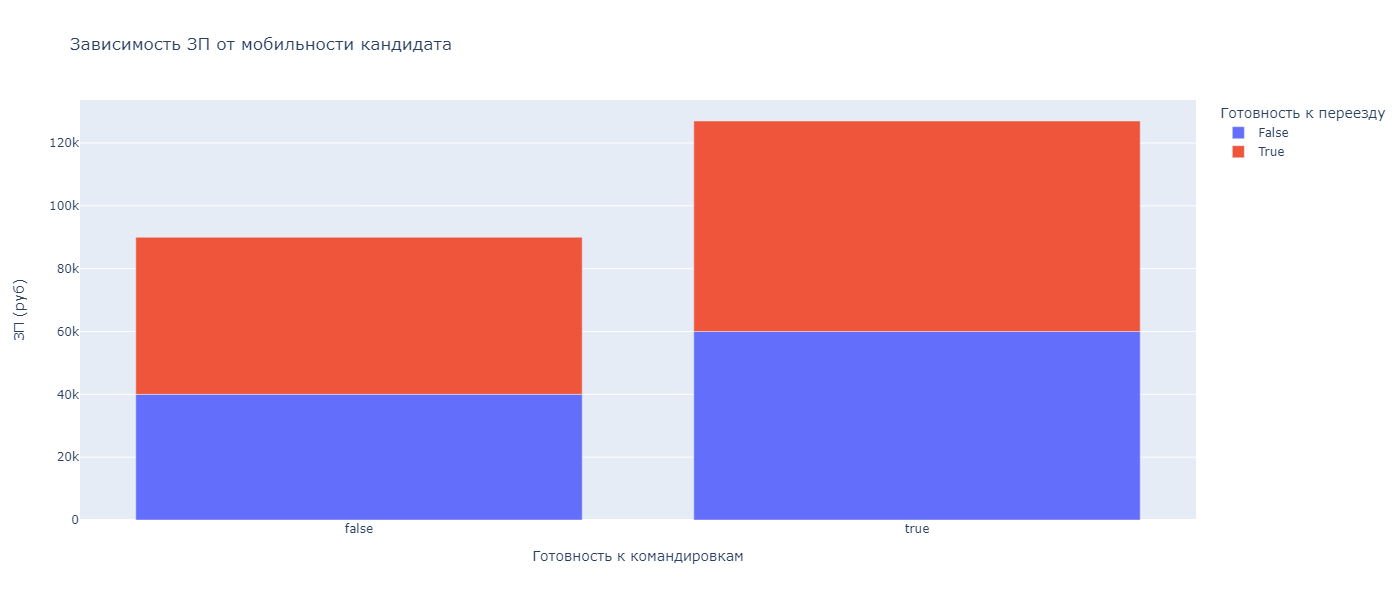

In [39]:
# Создаём DataFrame, в котором отразим зависимость медианной желаемой заработной платы от готовности к переезду и командировкам
bar_data2 = headhunter_df.groupby(
    by = ['Готовность к переезду', 'Готовность к командировкам'], as_index = False
)[['ЗП (руб)']].median()


# Строим многоуровневую столбчатую диаграмму
fig = px.bar(
    data_frame = bar_data2,                            # DataFrame
    x = 'Готовность к командировкам',                  # распределение по оси x
    y = 'ЗП (руб)',                                    # распределение по оси y
    height = 600,                                      # высота г
    width = 1400,                                      # ширина
    color = 'Готовность к переезду',                   # цвет графика
    title = 'Зависимость ЗП от мобильности кандидата'  # название графика
)

# Выводим график
fig.show('png')

**Вывод:** 

Из данной диаграммы можно сделать вывод, что признак ЗП имеет прямопропорциональную зависимость от показателей мобильности кандидата. Самый низкий уровень ЗП в размере 40к рублей предлагается кандидатам, не готовым ни к переезду, ни к командировкам. Соискателям, готовым к командировкам, но не готовым к переезду предлагают более высокую ЗП (в размере 60к рублей) чем тем, которые готовы к переезду, но не к командировкам (за их услуги предлагают 50к рублей). Самую же высокую ЗП (в размере 67к рублей) предлагают наиболее мобильным кандидатам, которые готовы и к переезду, и к командировкам. Это связано с тем, что работодатель может задействовать подчинённого в необходимом месте и на необходимый срок.

#### $4.7$

Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста («`Возраст`») и образования («`Образование`»).

По полученной сводной таблице построим тепловую карту.

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
Высшее,60000,0,122582,90075.5,30000,30000,30000,35000,40000,45000,...,70000,79000,112500,80000,75000,75000,62500,45000,90000,0
Неоконченное высшее,0,0,0,80000.0,25000,30000,31000,35000,40000,40000,...,0,0,0,0,0,0,0,0,0,0
Среднее,0,10000,0,44000.0,35000,45000,29000,40000,40000,35000,...,0,0,0,0,0,0,0,0,0,0
Среднее специальное,0,2000,30000,25000.0,25151,30000,30000,30000,30000,35000,...,120000,0,0,0,0,0,0,0,0,60000


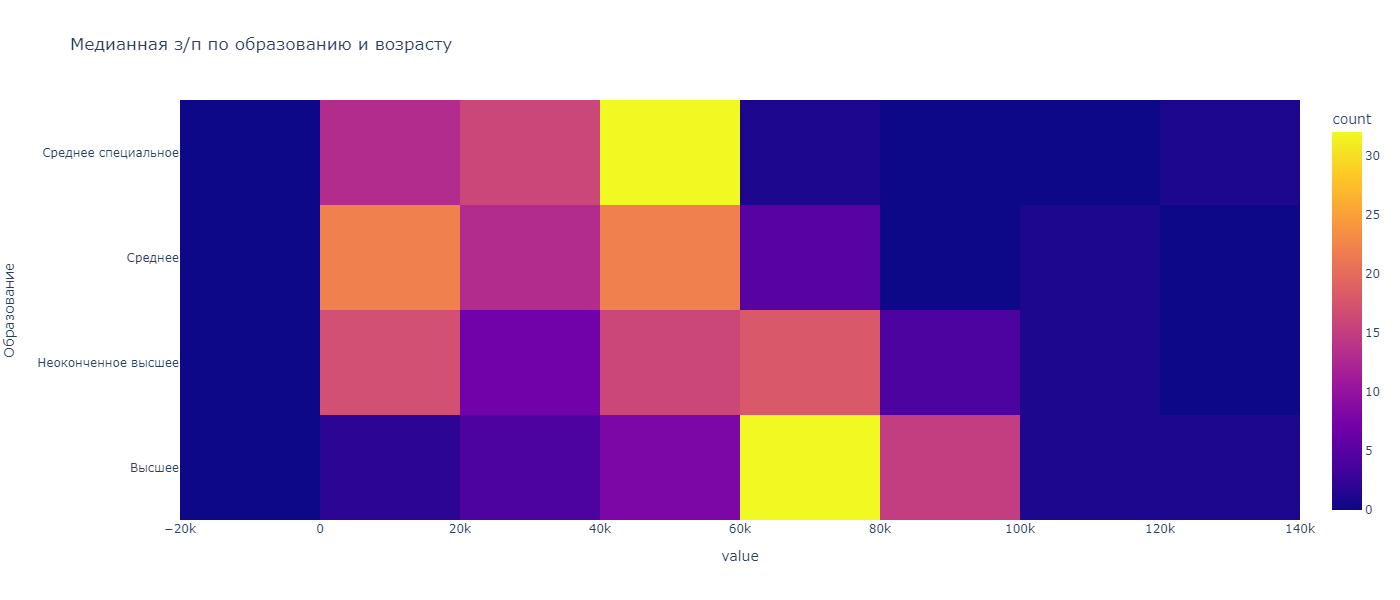

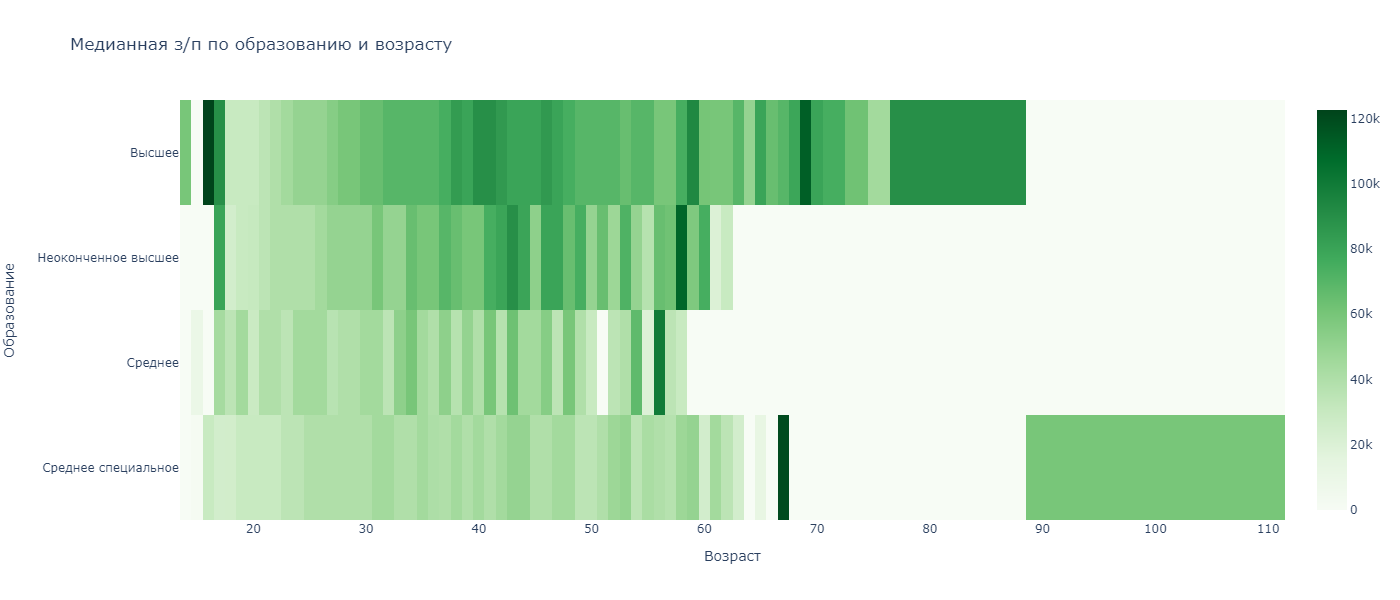

In [40]:
# Строим сводную таблицу
pivot_table = headhunter_df.pivot_table(
    index = 'Образование',
    columns = 'Возраст',
    values = 'ЗП (руб)',
    aggfunc = 'median',
    fill_value = 0
)

# Выводим сводную таблицу
display(pivot_table)



# Строим первую тепловую карту
fig1 = px.density_heatmap(
    data_frame = pivot_table,                          # DataFrame
    x = pivot_table.columns,                           # распределение по оси x
    y = pivot_table.index,                             # распределение по оси y
    title = 'Медианная з/п по образованию и возрасту'  # название графика
)

# Корректируем размер графика
fig1.update_layout(
    height = 600,                # высота
    width = 1400                 # ширина
)

# Выводим первый график
fig1.show('png')



# Строим вторую тепловую карту
fig2 = px.imshow(
    pivot_table,                                       # DataFrame
    aspect = 'auto',
    color_continuous_scale = 'greens',                 # цветовая палитра
    height = 600,                                      # высота
    width = 1400,                                      # ширина
    title = 'Медианная з/п по образованию и возрасту'  # название графика
)

# Выводим второй график
fig2.show('png')

**Вывод:** 

По тепловой карте можно заключить, что медианная ЗП имеет прямопропорциональную зависимость от возраста до 69 лет, а зависимость от уровня образования ещё больше. Медианная ЗП тех соискатели, которые находятся в возрастном диапазоне от 21 до 69 лет и имеющие высшее образование, растёт и находится в интервале от 30к до 112к рублей. 

У кандидатов, имеющих более низкий уровень образования, наблюдается похожая тенденция, только диапазоны возраста и ЗП ниже.

В данном признаке наблюдаются следующие аномалии: возрастной интервал кандидатов, имеющих высшее образование, находится в диапазоне от 14 лет, что не может соответствовать действительности, поэтому возрастная категория от 14 до 21 года не учитывается.

#### $4.8$

Построим диаграмму рассеяния, показывающую зависимость опыта работы («`Опыт работы (месяц)`») от возраста («`Возраст`»). Опыт работы переведём из месяцев в года, чтобы признаки были в едином масштабе.

Далее построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше неё, — аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

Text(0, 0.5, 'Опыт работы (год)')

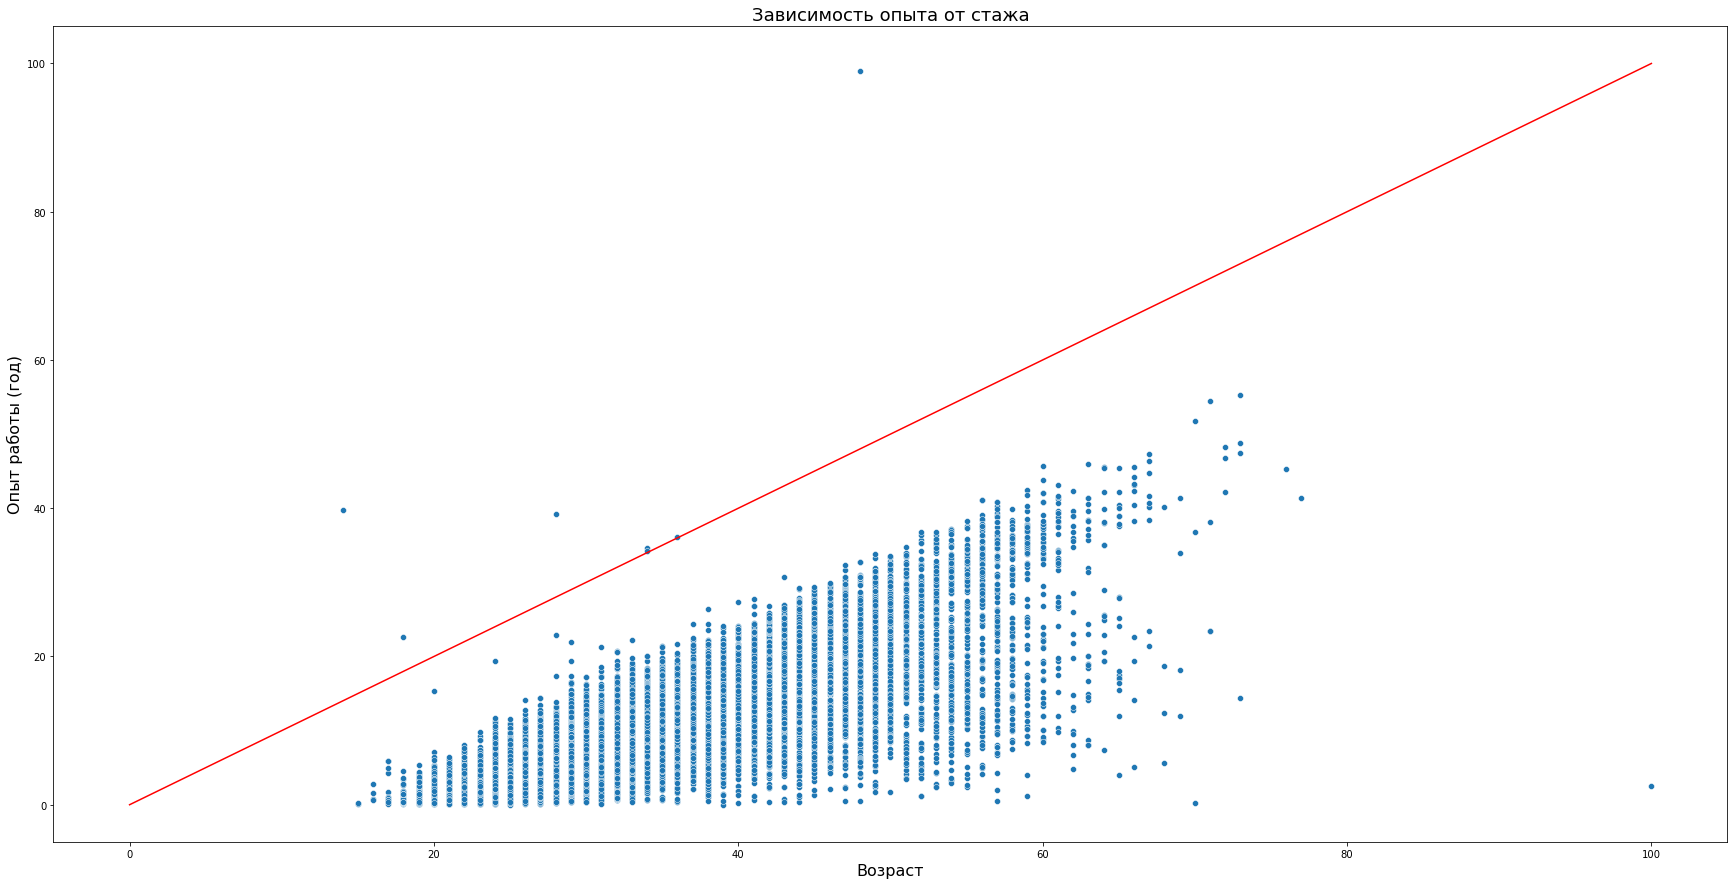

In [41]:
# Переводим месяцы в года
headhunter_df['Опыт работы (год)'] = headhunter_df['Опыт работы (месяц)'].apply(lambda x: x / 12)

# Задаём параметры графика
fig, ax = plt.subplots(figsize = (30, 15))

# Строим диаграмму рассеяния
scattplot = sns.scatterplot(
    data = headhunter_df,     # DataFrame
    x = 'Возраст',            # распределение по оси x
    y = 'Опыт работы (год)',  # распределение по оси y
);

# Строим линию
sns.lineplot(
    x = [0, 100],  # распределение по оси x
    y = [0, 100],  # распределение по оси y
    color = 'Red'  # цвет линии
);

# Задаём название графика
scattplot.set_title('Зависимость опыта от стажа', fontsize = 18);

# Задаём название по оси x
scattplot.set_xlabel('Возраст', fontsize = 16);

# Задаём название по оси y
scattplot.set_ylabel('Опыт работы (год)', fontsize = 16)

**Вывод:** 

Из данной диаграммы можно сделать вывод, что возраст и опыт работы имеют прямопропорциональную зависимость. В диаграмме также наблюдаются аномалии в количестве 7 точек, а именно: опыт работы либо равен, либо больше возраста соискателя. Данные аномалии не будут учитываться в статистике.

## <center> **`5.` Очистка данных**

При проведении визуального анализа были найдены следующие выбросы в данных: пропуски, гигантские размеры желаемых заработных плат, резюме людей слишком «преклонного» возраста, опыт работы, превышающий возраст.

Очистим данные от выбросов.

#### $5.1$

Найдём полные дубликаты в таблице с резюме и удалим их.

In [42]:
# Создадим список признаков
duplicates_columns = list(headhunter_df.columns)

# Вычислим признаки с дубликатами
mask = headhunter_df.duplicated(subset = duplicates_columns)

# Создаём DataFrame с признаками содержащими дубликаты
duplicates_df = headhunter_df[mask]
print(f'Число найденных дубликатов: {duplicates_df.shape[0]}')

# Удаляем дубликаты
headhunter_df = headhunter_df.drop_duplicates(subset = duplicates_columns)
print(f'Результирующее число записей: {headhunter_df.shape[0]}')

Число найденных дубликатов: 155
Результирующее число записей: 44589


#### $5.2$

В данных имеются пропуски в трёх столбцах: «`Опыт работы (месяц)`», «`Последнее/нынешнее место работы`», «`Последняя/нынешняя должность`». **Удалим строки, где есть пропуск в столбцах с местом работы и должностью**.

Пропуски в столбце с опытом работы заполним медианным значением.

In [43]:
# Выводим общее количество пропусков в данных
print('Количество пропусков в признаке "Опыт работы (месяц)": {}'.format(headhunter_df['Опыт работы (месяц)'].isnull().sum()))
print('Количество пропусков в признаке "Последнее/нынешнее место работы": {}'.format(headhunter_df['Последнее/нынешнее место работы'].isnull().sum()))
print('Количество пропусков в признаке "Последняя/нынешняя должность": {}'.format(headhunter_df['Последняя/нынешняя должность'].isnull().sum()))

# Удаляем строки с пропусками
headhunter_df = headhunter_df.dropna(subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Пропуски заполняем медианным значением
headhunter_df['Опыт работы (месяц)'] = headhunter_df['Опыт работы (месяц)'].fillna(headhunter_df['Опыт работы (месяц)'].median())

# Выведем среднее значение опыта работы в месяцах
print('\nСреднее значение опыта работы в месяцах: {}'.format(round(headhunter_df['Опыт работы (месяц)'].mean(), 2)))

Количество пропусков в признаке "Опыт работы (месяц)": 166
Количество пропусков в признаке "Последнее/нынешнее место работы": 1
Количество пропусков в признаке "Последняя/нынешняя должность": 2

Среднее значение опыта работы в месяцах: 114.35


#### $5.3$

Удалим резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

In [44]:
# Выводим количественные показатели по признаку 'ЗП (руб)'
salary_over_million = headhunter_df['ЗП (руб)'] > 1000000 # ЗП выше миллиона
salary_below_thousand = headhunter_df['ЗП (руб)'] < 1000 # ЗП ниже тысячи
print('Количество резюме с указанной ЗП выше 1000000 рублей: {}'.format(headhunter_df[salary_over_million].shape[0]))
print('Количество резюме с указанной ЗП ниже 1000 рублей: {}'.format(headhunter_df[salary_below_thousand].shape[0]))


# Удаляем данные резюме
headhunter_df = headhunter_df.drop(headhunter_df[salary_over_million].index, axis = 0)
headhunter_df = headhunter_df.drop(headhunter_df[salary_below_thousand].index, axis = 0)
print(f'\nРезультирующее число записей: {headhunter_df.shape[0]}')

Количество резюме с указанной ЗП выше 1000000 рублей: 5
Количество резюме с указанной ЗП ниже 1000 рублей: 84

Результирующее число записей: 44498


C:\Users\ilyaz\AppData\Local\Temp/ipykernel_5796/1654302331.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



#### $5.4$

В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. 

Найдём такие резюме и удалим их из данных.

In [45]:
print('Число записей в признаке Опыт работы (месяц): {}'.format(headhunter_df['Опыт работы (месяц)'].shape[0]))

# Выделяем выбросы в признаке 'Опыт работы (месяц)'
outliers_exp = headhunter_df[(headhunter_df['Опыт работы (месяц)'] / 12) > headhunter_df['Возраст']]

# Удалим данные выбросы
headhunter_df = headhunter_df.drop(outliers_exp.index, axis = 0)
print('Результирующее число записей: {}'.format(headhunter_df.shape[0]))

Число записей в признаке Опыт работы (месяц): 44498
Результирующее число записей: 44491


#### $5.5$

В результате анализа мы обнаружили потенциальные выбросы в признаке *"Возраст"*. Это оказались резюме людей чересчур преклонного возраста для поиска работы. 

Построим распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**.

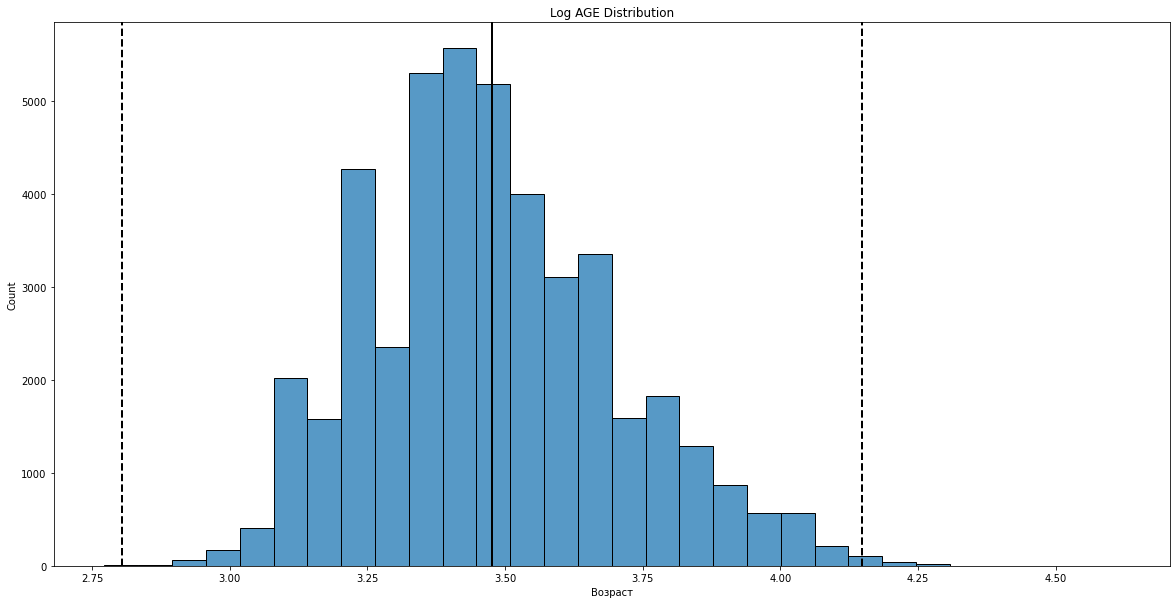

In [46]:
# Задаём параметры графика
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Производим логарифмирование
log_age = np.log(headhunter_df.Возраст + 1)

# Строим график
histplot = sns.histplot(log_age, bins=30, ax=ax)

# Задаём настройки графика
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3*log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3*log_age.std(), color='k', ls='--', lw=2)

# Название графика
histplot.set_title('Log AGE Distribution');

**Комментарий:** 

Из данного интервала можно заметить, что среднее значение находится правее моды, это говорит о том, что данное распределение имеет правостороннюю ассиметрию.

In [47]:
# Находим выбросы с помощью метода z-отклонения и удалим их из данных
def outliers_z_score(data, feature, log_scale=False):
    
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned



outliers, cleaned = outliers_z_score(headhunter_df, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


# Выводим выбросы
print('\nПотенциальные выбросы: {}'.format(outliers['Возраст'].unique()))

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44488

Потенциальные выбросы: [ 15 100]
